#Ejercicio 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

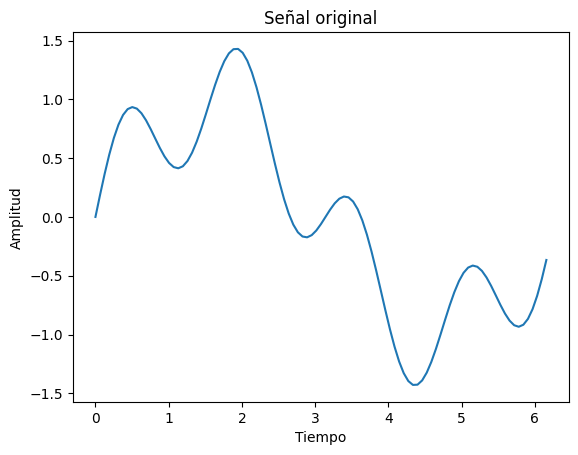

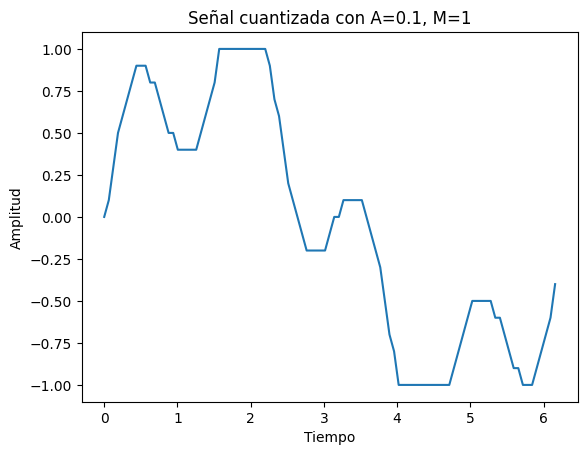

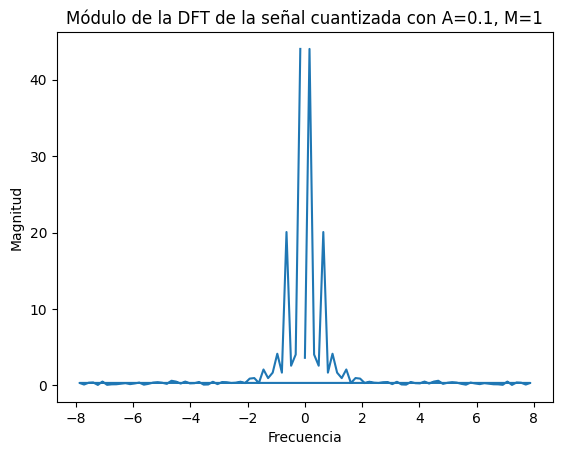

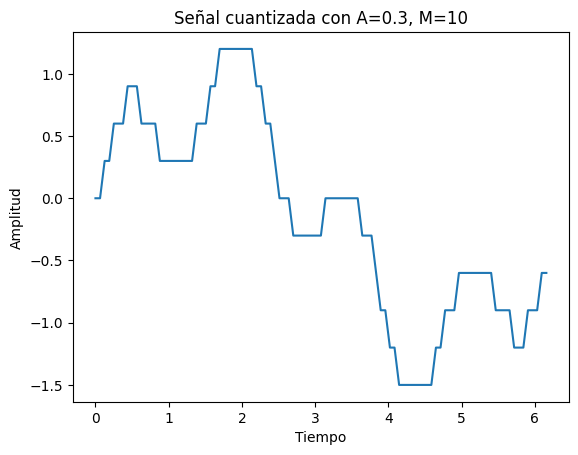

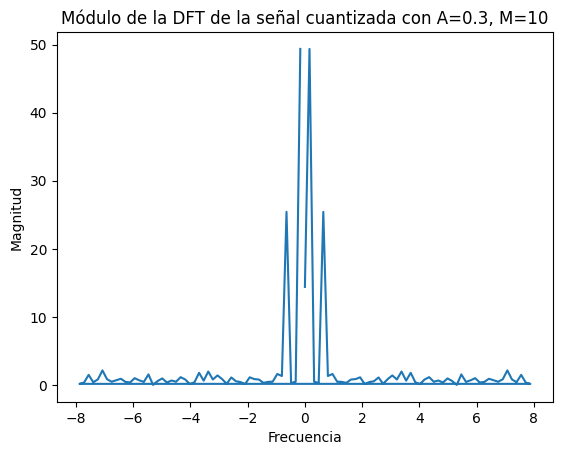

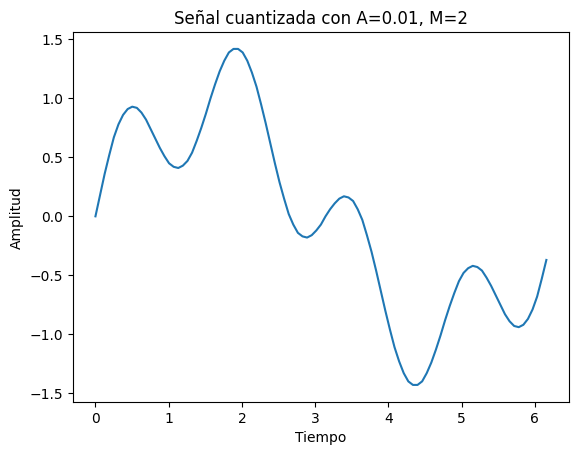

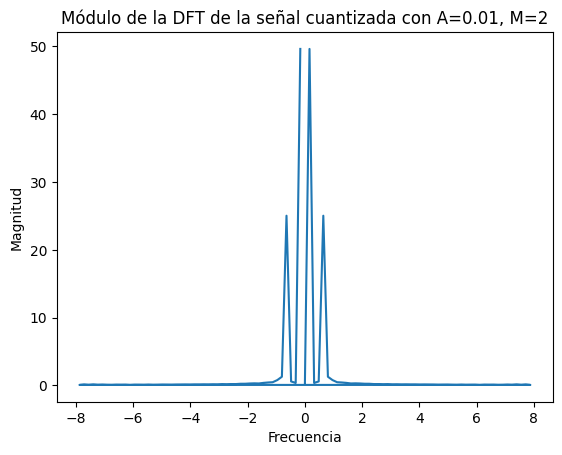

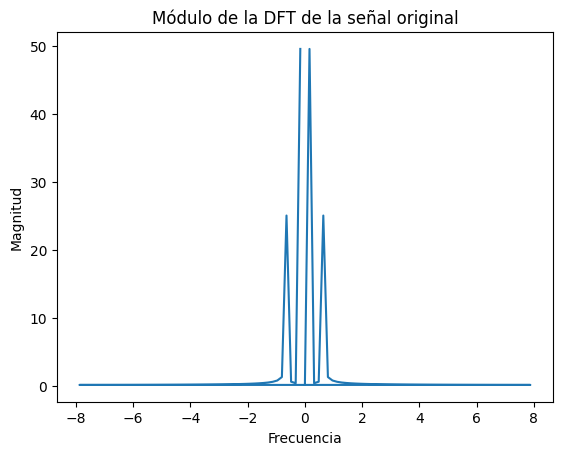

In [4]:

# Definimos el delta, que es el incremento de t, como 2*pi dividido entre 100
delta = 2 * np.pi / 100

# Creamos un arreglo ks que va desde 0 hasta 98
ks = np.arange(0, 99)

# Calculamos ts, que es ks multiplicado por delta, representando los tiempos discretos
ts = ks * delta

# Definimos la función s(t), que es una suma de dos senoidales: sin(t) y 1/2 * sin(4*t)
def s(t):
    return np.sin(t) + 1/2 * np.sin(4 * t)

# Obtenemos la señal original
original_signal = s(ts)

# Graficamos la señal original
plt.plot(ts, original_signal)
plt.title('Señal original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

# Calculamos la DFT de la señal original
dft_original = np.fft.fft(original_signal)
freqs = np.fft.fftfreq(len(original_signal), delta)

# Obtenemos el módulo de la DFT de la señal original
magnitude_dft_original = np.abs(dft_original)

# Función para cuantizar la señal
def quantize_signal(signal, A, M):
    return np.maximum(np.minimum(A * np.floor(signal / A), M), -M)

# Parámetros de cuantización
params = [
    (0.1, 1),
    (0.3, 10),
    (0.01, 2)
]

# Graficamos y calculamos la DFT para cada cuantización
for i, (A, M) in enumerate(params):
    quantized_signal = quantize_signal(original_signal, A, M)

    # Calculamos la DFT de la señal cuantizada
    dft_quantized = np.fft.fft(quantized_signal)

    # Obtenemos el módulo de la DFT de la señal cuantizada
    magnitude_dft_quantized = np.abs(dft_quantized)

    # Graficamos la señal cuantizada
    plt.figure()
    plt.plot(ts, quantized_signal)
    plt.title(f'Señal cuantizada con A={A}, M={M}')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

    # Graficamos el módulo de la DFT de la señal cuantizada
    plt.figure()
    plt.plot(freqs, magnitude_dft_quantized)
    plt.title(f'Módulo de la DFT de la señal cuantizada con A={A}, M={M}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Magnitud')
    plt.show()

# Graficamos el módulo de la DFT de la señal original para comparación
plt.figure()
plt.plot(freqs, magnitude_dft_original)
plt.title('Módulo de la DFT de la señal original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()
